# Tutorial : Quick Start with Dynap-SE2

## Introduction

<img src=https://raw.githubusercontent.com/synsense/rockpool/dev/dynapse_support/docs/devices/DynapSE/images/dynapse2.jpeg
 width="1024">

Dynap-SE2, (DYnamic Neuromorphic Asynchronous Processor - ScalablE 2) inherits the event-driven nature of the DYNAP family. The mixed-signal chip uses analog spiking neurons and analog synapses as the computing units, which directly emulates biological behavior. Transistors of the neural cores operate in the subthreshold region, which results in power consumption of about one-thousandth to one-millionth of the state-of-the-art digital neuromorphic chips, below mW. Each chip features 1024 adaptive exponential integrate-and-fire analog ultra-low-power spiking neurons and 64 synapses per neuron with configurable delay, weight, and short-term plasticity. 



## Structure

Each Dynap-SE2 chip has 1024 neurons distributed over 4 individually configurable neural cores, connected by a patented hierarchical routing grid. The tag-based routing infrastructure provides direct communication from one chip to 15×15 surrounding chips (7 steps west, 7 steps north, 7 steps east, 7 steps south), connecting up to 230k neurons. Each neural core holds a `parameter group` to set the neuronal and synaptic parameters for its 256 neurons and their pre-synaptic synapses. The neurons in the same core share the same parameter values, including time constants, refractory periods, synaptic connection strengths and etc. Below, we can see 23 simulated parameters of over 70 configuration biases.

<img src=https://raw.githubusercontent.com/synsense/rockpool/dev/dynapse_support/docs/devices/DynapSE/images/dynapse_structure.png
 width="1024">



| PARAM         | Simulation  | Details                                                                                            |
| ------------- | ----------- | -------------------------------------------------------------------------------------------------- |
| SOIF_DC_P     | Idc         | Constant DC current injected to membrane in Amperes                                                |
| DENM_NMREV_N  | If_nmda     | NMDA gate soft cut-off current setting the NMDA gating voltage in Amperes                          |
| SOAD_GAIN_P   | Igain_ahp   | gain bias current of the spike frequency adaptation block in Amperes                               |
| DEAM_EGAIN_P  | Igain_ampa  | gain bias current of excitatory AMPA synapse in Amperes                                            |
| DEGA_IGAIN_P  | Igain_gaba  | gain bias current of inhibitory GABA synapse in Amperes                                            |
| DENM_EGAIN_P  | Igain_nmda  | gain bias current of excitatory NMDA synapse in Amperes                                            |
| DESC_IGAIN_P  | Igain_shunt | gain bias current of the inhibitory SHUNT synapse in Amperes                                       |
| SOIF_GAIN_N   | Igain_mem   | gain bias current for neuron membrane in Amperes                                                   |
| SOAD_PWTAU_N  | Ipulse_ahp  | bias current setting the pulse width for spike frequency adaptation block `t_pulse_ahp` in Amperes |
| SYPD_EXT_N    | Ipulse      | bias current setting the pulse width for neuron membrane `t_pulse` in Amperes                      |
| SOIF_REFR_N   | Iref        | bias current setting the refractory period `t_ref` in Amperes                                      |
| SOIF_SPKTHR_P | Ispkthr     | spiking threshold current, neuron spikes if `Imem > Ispkthr` in Amperes                            |
| SOAD_TAU_P    | Itau_ahp    | Spike frequency adaptation leakage current setting the time constant `tau_ahp` in Amperes          |
| DEAM_ETAU_P   | Itau_ampa   | AMPA synapse leakage current setting the time constant `tau_ampa` in Amperes                       |
| DEGA_ITAU_P   | Itau_gaba   | GABA synapse leakage current setting the time constant `tau_gaba` in Amperes                       |
| DENM_ETAU_P   | Itau_nmda   | NMDA synapse leakage current setting the time constant `tau_nmda` in Amperes                       |
| DESC_ITAU_P   | Itau_shunt  | SHUNT synapse leakage current setting the time constant `tau_shunt` in Amperes                     |
| SOIF_LEAK_N   | Itau_mem    | Neuron membrane leakage current setting the time constant `tau_mem` in Amperes                     |
| SYAM_W0_P     | Iw_0        | weight bit 0 current of the neurons of the core in Amperes                                         |
| SYAM_W1_P     | Iw_1        | weight bit 1 current of the neurons of the core in Amperes                                         |
| SYAM_W2_P     | Iw_2        | weight bit 2 current of the neurons of the core in Amperes                                         |
| SYAM_W3_P     | Iw_3        | weight bit 3 current of the neurons of the core in Amperes                                         |
| SOAD_W_N      | Iw_ahp      | spike frequency adaptation weight current of the neurons of the core in Amperes                    |




## Routing

For the event delivery between neurons, a two-stage tag-based routing scheme [1] is used. It’s a novel routing methodology to handle the asynchronous address-event traffic. 

<img src=https://raw.githubusercontent.com/synsense/rockpool/dev/dynapse_support/docs/devices/DynapSE/images/neuron_connection.png
 width="1024">


By default, the routing mechanism use globally multiplexed locally unique tags. In this scheme, cores are defined as local clusters (N/C). Each connection (axon) between synapses is "tagged" by a unique label, a number between 0-2048. The same tag can be reused in different clusters, also in the same cluster (being aware of artifacts). AER events are routed between chips, having a destination chip, core mask and connection tag.

Each neuron has 64 content addressable memory (CAM) holding listening connection tag and synapse type information; and 4 SRAMs holding broadcasting destination information. That means each AdExpIF neuron has a potential of 64 synapses to receive events produced by its presynaptic neurons. 

There are 4 different types of synapses: AMPA, GABA, NMDA, and SHUNT processing the receiving event. Also, each neuron can broadcast its activity to 4 different chips with a core mask so that to specify the destination cores on the target chip.

[1] S. Moradi, N. Qiao, F. Stefanini, and G. Indiveri, “A scalable multicore architecture with heterogeneous memory structures for dynamic neuromorphic asynchronous processors (dynaps),” IEEE Transactions on Biomedical Circuits and Systems, vol. 12, no. 1, pp. 106–122, 2018.





## Simulation

The device configuration include both the connectivity information stored in the digital memory content, and also the bias setting parameters. The simulator converts the memory map to weight matrices using the synaptic current strength biases and the distributed memory content. It also converts the bias setting to current values using measurement data. With these two, the simulator can calculate the time dependend dynamics and route the spikes between neurons!


<img src=https://raw.githubusercontent.com/synsense/rockpool/dev/dynapse_support/docs/devices/DynapSE/images/simulation_config.png
 width="1024">




---
## Setup

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Utils
from typing import Dict, Optional
import numpy as np
import json

# Rockpool Imports
from rockpool.timeseries import TSEvent
from rockpool.nn.modules.jax import LinearJax
from rockpool.nn.combinators import Sequential

## Dynap-SE2
from rockpool.devices.dynapse.config.simconfig import DynapSimConfig, DynapSimCore
from rockpool.devices.dynapse.dynapsim import DynapSim
from rockpool.devices.dynapse.utils.figure import Figure
from rockpool.devices.dynapse.config.weights import WeightParameters

# - Plotting and config
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100

### Utilities

In [2]:
# @title Printing { display-mode: "form" }


def print_json(
    __dict: Dict[str, np.ndarray], mean: bool = True, precision: int = 1
) -> None:
    """
    print_json gets a dictionary of numpy arrays and prints nicely converting it json

    :param __dict: dictionary to print
    :type __dict: Dict[str, np.ndarray]
    :param mean: take the mean values of the arrays or not, defaults to True
    :type mean: bool, optional
    :param precision: number of digits of precision for floating point output, defaults to 1
    :type precision: int, optional
    """

    if mean:
        __dict = {k: f"{v.mean():.{precision}e}" for k, v in __dict.items()}
    else:
        __dict = {k: list(v) for k, v in __dict.items()}
    jstring = json.dumps(__dict, indent=4)
    print(jstring)


In [3]:
# @title Data Generation { display-mode: "form" }


def poisson_spike_train(
    n_channels: int,
    duration: float,
    rate: float,
    dt: float,
    seed: Optional[int] = None,
) -> np.ndarray:
    """
    random_spike_train generates a Poisson frozen random spike train

    :param n_channels: number of channels
    :type n_channels: float
    :param duration: simulation duration in seconds
    :type duration: float
    :param rate: expected mean spiking rate in Hertz(1/s)
    :type rate: float
    :param dt: time step length
    :type dt: float, optional
    :param seed: the random number seed
    :type seed: int, optional
    :raises ValueError: no spike generated due to low firing rate or very short simulation time]
    :return: randomly generated discrete spike train
    :rtype: np.ndarray
    """
    np.random.seed(seed)
    steps = int(np.round(duration / dt))
    raster = np.random.poisson(rate * dt, (steps, n_channels))

    # Check if raster has at least one spike
    if not any(raster.flatten()):
        raise ValueError(
            "No spike generated at all due to low firing rate or short simulation time duration!"
        )

    spike_tensor = np.array(raster, dtype=float)
    return spike_tensor


# Simulation Pipeline

<img src=https://raw.githubusercontent.com/synsense/rockpool/dev/dynapse_support/docs/devices/DynapSE/images/software_pipeline.png
 width="1024">



# Section 1 : Model Implementation

Options : 

1. From `samna` device configuration object (device simulation)
    supports both Dynap-SE1 and Dynap-SE2
    * `DynapSimConfig.from_Dynapse1Configuration(config)`
    * `DynapSimConfig.from_Dynapse2Configuration(config)`

---

2. From simulation current configuration (experienced user)
    * leakage currents, gain currents, synaptic weight currents, layout parameters and etc.
    * `DynapSimConfig(Itau_mem=2e-9, Igain_ampa=1e-12, ...)`


---

3. From high-level parameter specification (intuitive)
    * time constant, gain ratios, synaptic weight currents, layout parameters and etc.
    * `DynapSimConfig.from_specification(tau_mem=1e-3, r_gain_ampa=4, ...)`





First, let's try high-level parameter specification!

## Section 1.1 : Global Parameters

Define the time step, number of input channels, number of neurons and output channels

In [4]:
dt = 1e-3
n_in = 2
n_rec = 3
n_out = 3
n_syn = 4  # non-changable for now


## Section 1.2 : Weights

Dynap-SE2 has 4 independent base weight currents 

| Current | Value |
| ------- | ----- |
| Iw_0    | 1e-7  |
| Iw_1    | 2e-7  |
| Iw_2    | 4e-7  |
| Iw_3    | 8e-7  |

<br />

4-bit freedom to compose a weight current per connection 

  * Mask: 1000 → Iw3 = 8e-7
  * Mask: 0101 → Iw0 +Iw2 = 1e-7 + 4e-7 = 5e-7

Using this idea, we can express the connectivity between neurons using weight matrices. First, we need a weight mask matrix, then using the weight bit currents, we can calculate the exact weight matrix.

The simulator uses three-dimensional weight matrices for this.
* First dimension : pre-synaptic neuron
* Second dimension : post-synaptic neuron
* Third dimension : synaptic gate type [`AMPA`, `GABA`, `NMDA`, `SHUNT`]
  * Order fixed : alphabetical

Let's have some random weight masks!

In [5]:
w_in_mask = DynapSimConfig.poisson_mask(
    shape=(n_in, n_rec, n_syn),
    fill_rate=[0.5, 0.1, 0.1, 0.1],  # AMPA / GABA / NMDA / SHUNT
    seed=20,
)
w_in_mask


array([[[ 2,  0,  0,  0],
        [ 7,  0,  0,  0],
        [13,  0,  0,  0]],

       [[ 8,  0,  0,  0],
        [ 0,  0, 14,  0],
        [ 0,  0,  0,  0]]])

In [6]:
w_rec_mask = DynapSimConfig.poisson_mask(
    shape=(n_rec, n_rec, n_syn),
    fill_rate=[0.0, 0.15, 0.1, 0.15],  # AMPA / GABA / NMDA / SHUNT
    seed=22,
)
w_rec_mask


array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  9,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0]],

       [[ 0,  0,  0,  0],
        [ 0,  0, 12,  0],
        [ 0,  0,  0,  0]]])

In [7]:
w_out = np.eye(n_rec, n_out)
w_out


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Section 1.3 : Simulation Configuration

Highly configurable neural cores is both a curse and a feature! For the device simulation, we need to set 
* 13 layout parameters including capacitor values, and transistor properties.
  * `rockpool.devices.dynapse.config.simconfig.DynapSimLayout`
* 23 current values representing a subset of 70 device parameters
  * `rockpool.devices.dynapse.config.simconfig.DynapSimCurrents`
  * `rockpool.devices.dynapse.config.simconfig.DynapSimWeightBits`
* weight masks
  
Fortunately, we have default values set for every one of them. Also, we do not need to worry about exact current values while setting properties that have higher level representations like time constants. We can directly set the time constants and the simulation configuration object finds the exact current values using the layout parameters and the desired tau value.

Below, there is an example.

In [8]:
simconfig = DynapSimConfig.from_specification(
    shape=(n_in, n_rec, n_out),
    w_in_mask=w_in_mask,
    w_rec_mask=w_rec_mask,
    w_out=w_out,
    Iw_0=1e-9,
    Iw_1=2e-9,
    Iw_2=4e-9,
    Iw_3=8e-9,
    Ispkthr=1e-6,
    tau_ahp=50e-3,
    tau_ampa=10e-3,
    tau_gaba=100e-3,
    tau_nmda=100e-3,
    tau_shunt=10e-3,
    tau_mem=20e-3,
)


The high-level projections of the currents setting time consant values

In [9]:
print_json(simconfig.time.__dict__)


{
    "t_pulse_ahp": "1.0e-06",
    "t_pulse": "1.0e-05",
    "t_ref": "2.0e-03",
    "tau_ahp": "5.0e-02",
    "tau_ampa": "1.0e-02",
    "tau_gaba": "1.0e-01",
    "tau_nmda": "1.0e-01",
    "tau_shunt": "1.0e-02",
    "tau_mem": "2.0e-02"
}


The ratio between gain and tau current values

In [10]:
print_json(simconfig.gain.__dict__)


{
    "r_gain_ahp": "1.0e+03",
    "r_gain_ampa": "1.0e+02",
    "r_gain_gaba": "1.0e+02",
    "r_gain_nmda": "1.0e+02",
    "r_gain_shunt": "1.0e+02",
    "r_gain_mem": "4.0e+00"
}


Parameters representing circuit layout

In [11]:
print_json(simconfig.layout.__dict__)


{
    "C_ahp": "4.0e-11",
    "C_ampa": "2.5e-11",
    "C_gaba": "2.5e-11",
    "C_nmda": "2.5e-11",
    "C_pulse_ahp": "5.0e-13",
    "C_pulse": "5.0e-13",
    "C_ref": "1.5e-12",
    "C_shunt": "2.5e-11",
    "C_mem": "3.0e-12",
    "Io": "5.0e-12",
    "kappa_n": "7.5e-01",
    "kappa_p": "6.6e-01",
    "Ut": "2.5e-02",
    "Vth": "7.0e-01"
}


The intermediate level simulation currents

In [12]:
print_json(simconfig.currents.__dict__, precision=2)


{
    "Idc": "5.00e-12",
    "If_nmda": "5.00e-12",
    "Igain_ahp": "2.84e-08",
    "Igain_ampa": "8.69e-09",
    "Igain_gaba": "8.87e-10",
    "Igain_nmda": "8.87e-10",
    "Igain_shunt": "8.69e-09",
    "Igain_mem": "2.13e-11",
    "Ipulse_ahp": "3.50e-07",
    "Ipulse": "3.50e-08",
    "Iref": "5.25e-10",
    "Ispkthr": "1.00e-06",
    "Itau_ahp": "2.84e-11",
    "Itau_ampa": "8.69e-11",
    "Itau_gaba": "8.87e-12",
    "Itau_nmda": "8.87e-12",
    "Itau_shunt": "8.69e-11",
    "Itau_mem": "5.32e-12",
    "Iw_ahp": "1.00e-09"
}


In [13]:
print_json(simconfig.weight_bits.__dict__)


{
    "Iw_0": "1.0e-09",
    "Iw_1": "2.0e-09",
    "Iw_2": "4.0e-09",
    "Iw_3": "8.0e-09"
}


In [14]:
np.set_printoptions(1)
simconfig.w_in


DeviceArray([[[2.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [7.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [1.3e-08, 0.0e+00, 0.0e+00, 0.0e+00]],

             [[8.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [0.0e+00, 0.0e+00, 1.4e-08, 0.0e+00],
              [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]]], dtype=float32)

# Section 2 : Model Investigation

## Section 2.1 Building Spiking Neural Network

In [15]:
# --- Input Layer --- #
linear_in = LinearJax(
    shape=(n_in, n_rec * n_syn),
    weight=simconfig.w_in.reshape(n_in, -1),
    has_bias=False,
)
linear_in


LinearJax  with shape (2, 12)

In [16]:
# --- DynapSim Layer --- #
dynapsim = DynapSim.from_DynapSimConfig(
    shape=(n_rec * n_syn, n_rec), has_rec=True, simconfig=simconfig
)
dynapsim


DynapSim  with shape (12, 3)

In [17]:
# --- Output Layer --- #
linear_out = LinearJax(
    shape=(n_rec, n_out),
    weight=simconfig.w_out,
    has_bias=False,
)
linear_out


LinearJax  with shape (3, 3)

In [18]:
model = Sequential(linear_in, dynapsim, linear_out)
model


JaxSequential  with shape (2, 3) {
    LinearJax '0_LinearJax' with shape (2, 12)
    DynapSim '1_DynapSim' with shape (12, 3)
    LinearJax '2_LinearJax' with shape (3, 3)
}

In [19]:
(simconfig.Iw_ahp / simconfig.Itau_ahp + 1) * simconfig.time.t_pulse_ahp /simconfig.time.tau_ahp

array([0., 0., 0.])

## Section 2.2 : Generate Input Spike Train
Generate a random poisson spike train with a mean firing rate of 20 Hz.

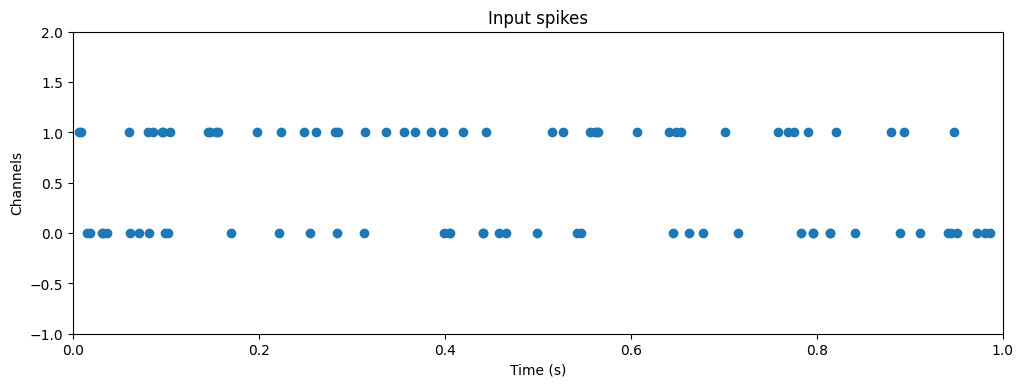

In [20]:
spikes_in = poisson_spike_train(
    n_channels=n_in, duration=1.0, rate=50.0, dt=dt, seed=2022
)
spike_ts_in = TSEvent.from_raster(spikes_in, name="Input spikes", periodic=True, dt=dt)
spike_ts_in.plot()


In [21]:
# dynapsim.__one

## Section 2.3 Observe State Evolution Over Time

The Rockpool model simulates the spiking neural network for the duration of the input spike train and produce three output objects

* `out` is the spiking ouput response of the system
* `state` is the resulting state that the network got into, that is the last time step status of the state variables
* `record dictionary` stores the evolution of the currents through time

In [22]:
model.reset_state()
out, state, record_dict = model(spikes_in, record=True)


[ ] Here you can print and investigate the output structure of the model!

### The output Spikes

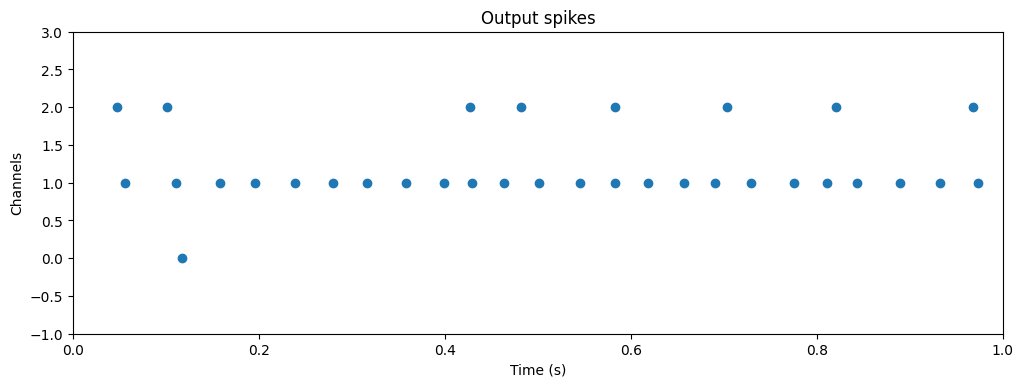

In [23]:
spike_ts_out = TSEvent.from_raster(out, name="Output spikes", periodic=True, dt=dt)
spike_ts_out.plot()


### Membrane Current and Membrane Potential

non-periodic TSContinuous object `unnamed` from t=0.0 to 1.0. Samples: 1000. Channels: 3

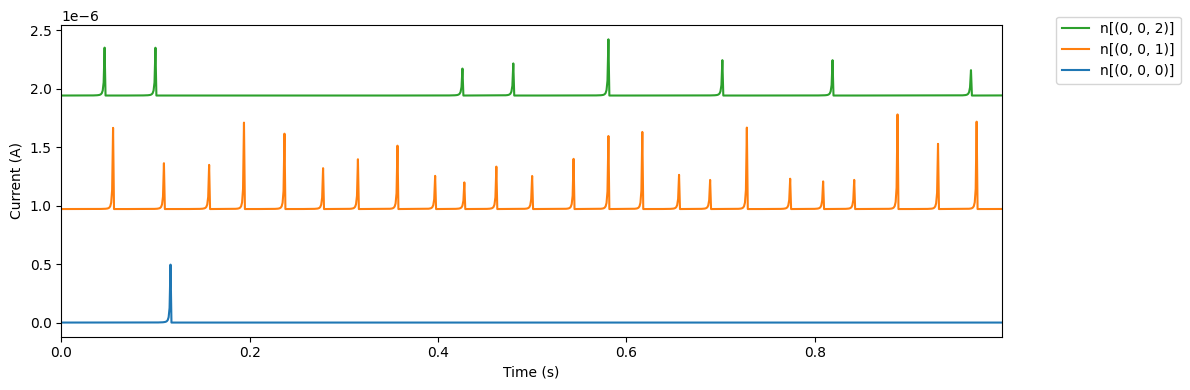

In [24]:
Figure.plot_Ix(record_dict["1_DynapSim"]["imem"], idx_map=simconfig.router.idx_map)


non-periodic TSContinuous object `unnamed` from t=0.0 to 1.0. Samples: 1000. Channels: 3

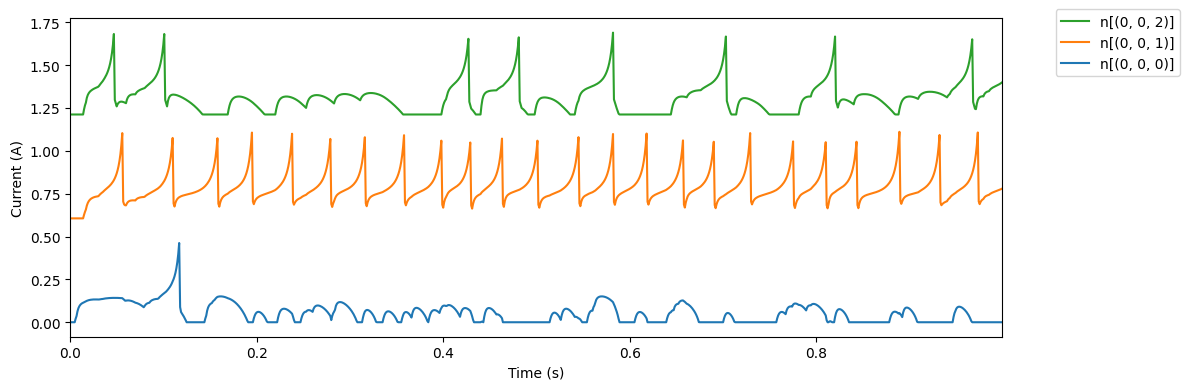

In [25]:
Figure.plot_Ix(record_dict["1_DynapSim"]["vmem"], idx_map=simconfig.router.idx_map)


Get a single neuron's membrane potential change

non-periodic TSContinuous object `unnamed` from t=0.0 to 1.0. Samples: 1000. Channels: 1

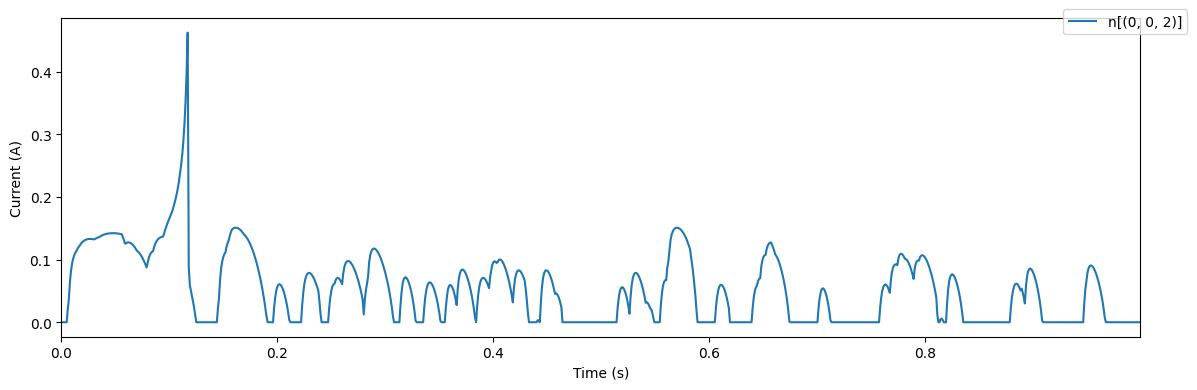

In [26]:
Figure.plot_Ix(
    record_dict["1_DynapSim"]["vmem"][:, 0], idx_map=simconfig.router.idx_map
)


Clip

non-periodic TSContinuous object `unnamed` from t=0.0 to 0.2. Samples: 200. Channels: 1

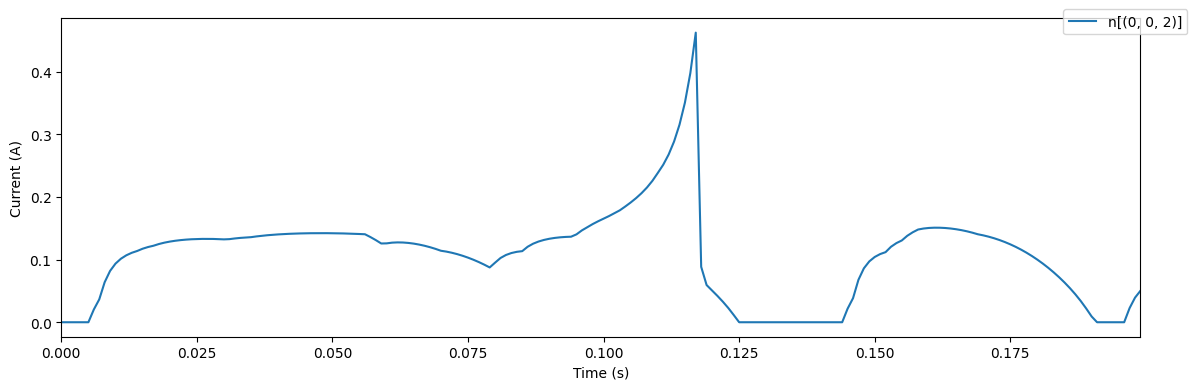

In [27]:
Figure.plot_Ix(
    record_dict["1_DynapSim"]["vmem"][:200, 0], idx_map=simconfig.router.idx_map
)


### Synaptic Currents

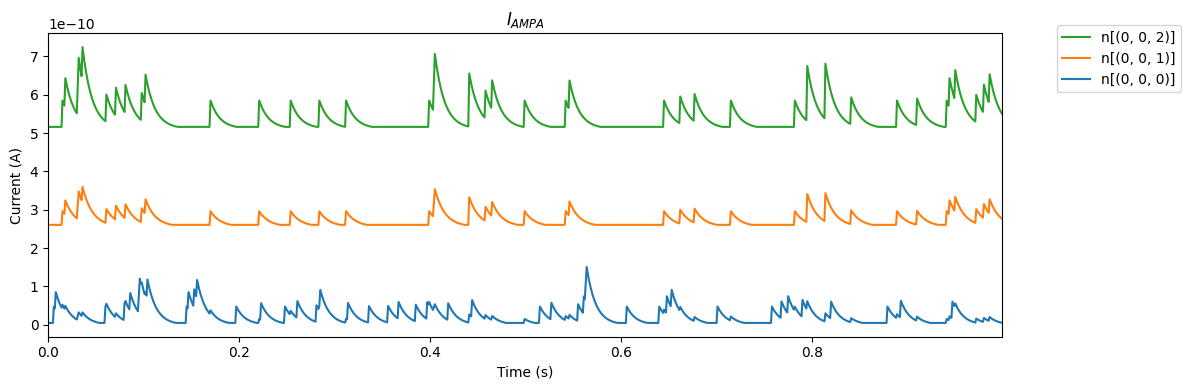

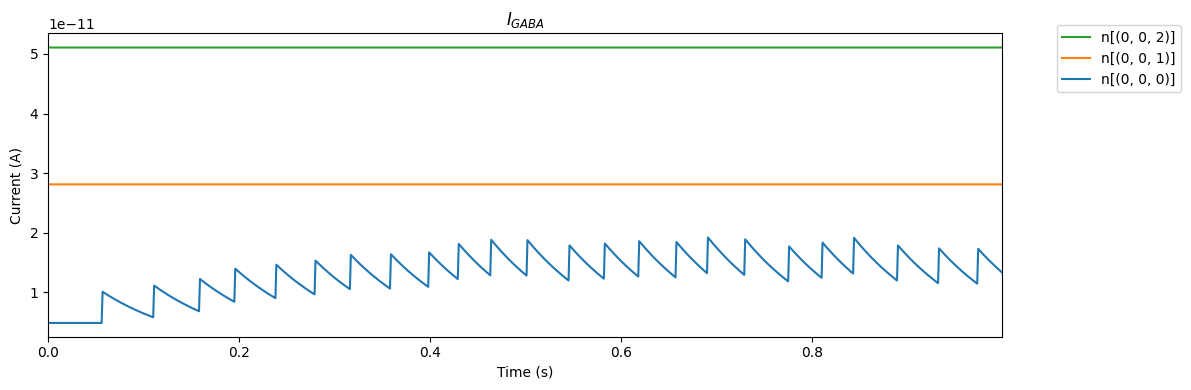

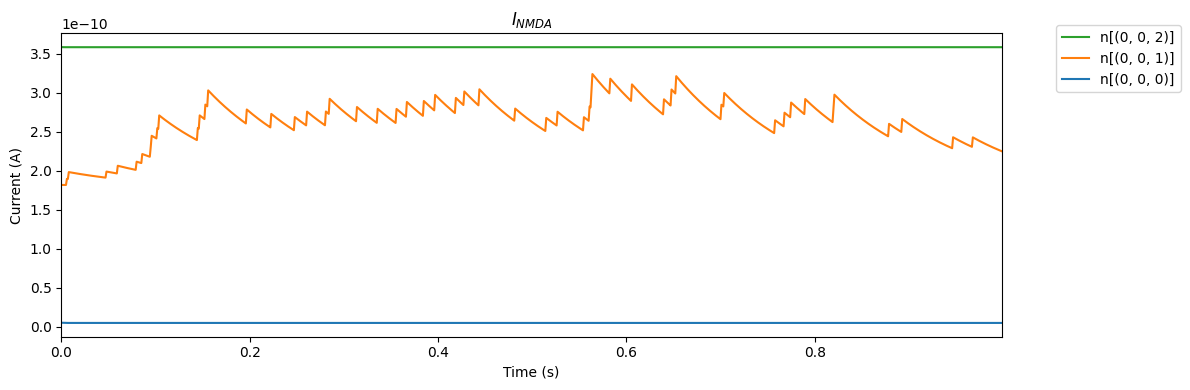

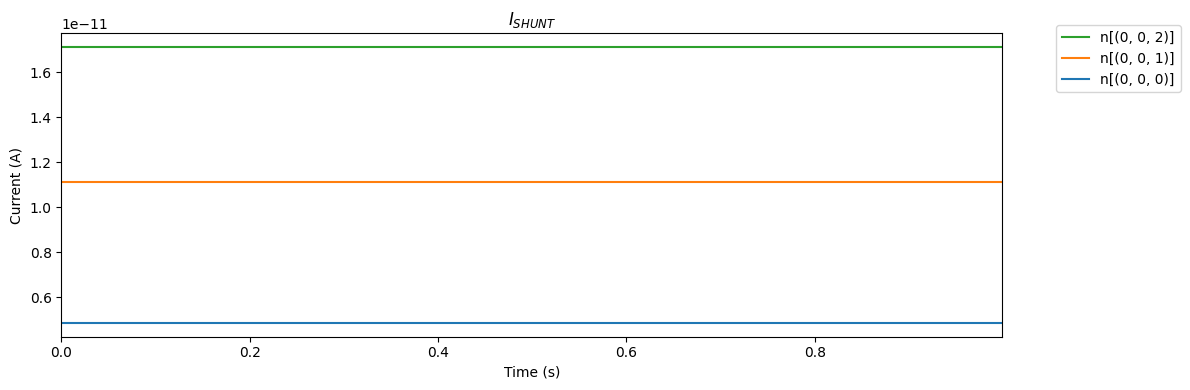

In [28]:
for c in ["AMPA", "GABA", "NMDA", "SHUNT"]:
    plt.figure()
    Figure.plot_Ix(
        record_dict["1_DynapSim"][f"i{c.lower()}"],
        name=f"$I_{{{c}}}$",
        idx_map=simconfig.router.idx_map,
    )


### Trace the effect of recurrent & input spikes on synaptic currents

(non-periodic TSContinuous object `$I_{AMPA}$ n[(0, 0, 2)]` from t=0.0 to 1.0. Samples: 1000. Channels: 1,
 non-periodic `TSEvent` object `` from t=0.0 to 1.0. Channels: 1. Events: 43,
 ['s[0]'])

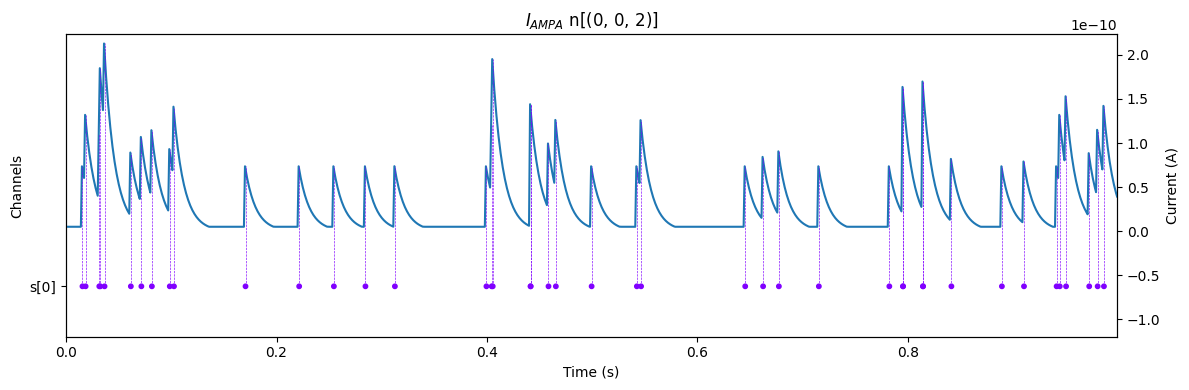

In [29]:
Figure.plot_Isyn_trace(
    input_ts=spike_ts_in,
    output_ts=spike_ts_out,
    record_dict=record_dict["1_DynapSim"],
    post=(0, 0, 2),
    syn_name="AMPA",
    router=simconfig.router,
)


(non-periodic TSContinuous object `$I_{SHUNT}$ n[(0, 0, 2)]` from t=0.0 to 1.0. Samples: 1000. Channels: 1,
 Empty `TSEvent` object `` from t=0.0 to t=1.0.,
 [])

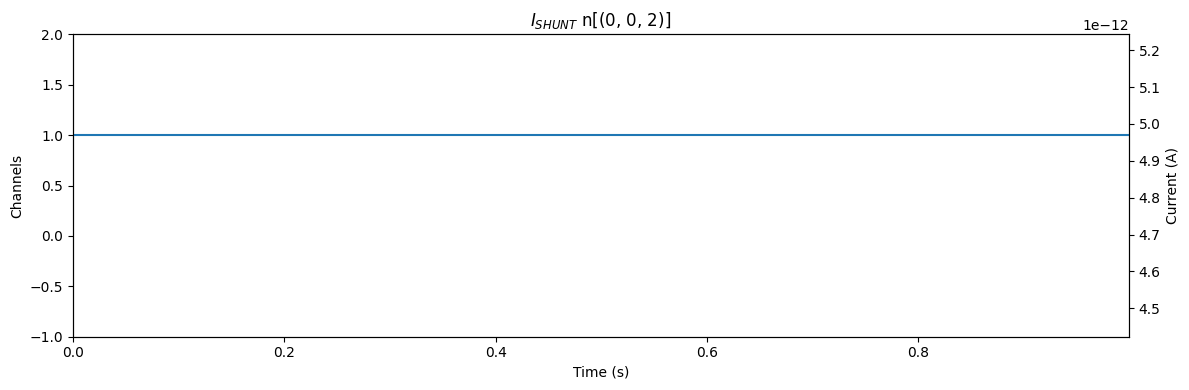

In [30]:
Figure.plot_Isyn_trace(
    input_ts=spike_ts_in,
    output_ts=spike_ts_out,
    record_dict=record_dict["1_DynapSim"],
    post=(0, 0, 2),
    syn_name="SHUNT",
    router=simconfig.router,
)


(non-periodic TSContinuous object `$I_{AHP}$ n[(0, 0, 1)]` from t=0.0 to 1.0. Samples: 1000. Channels: 1,
 non-periodic `TSEvent` object `` from t=0.0 to 1.0. Channels: 1. Events: 24,
 ['n[(0, 0, 1)]'])

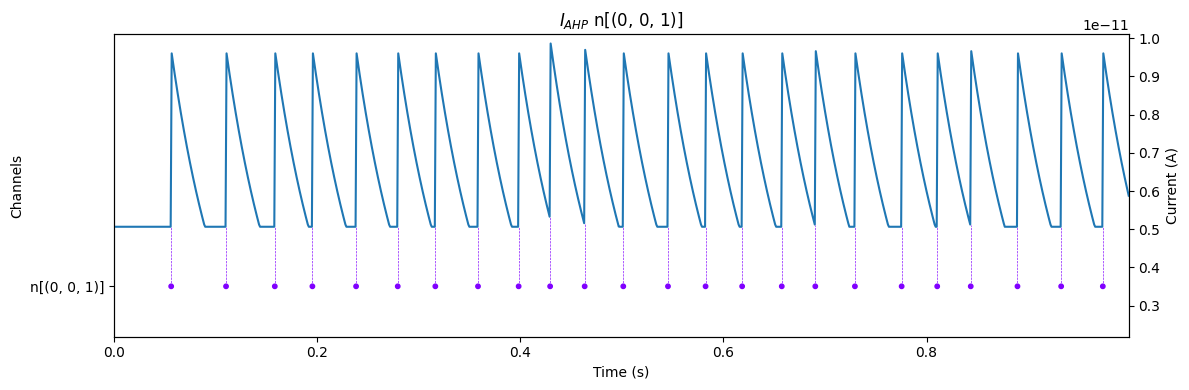

In [31]:
Figure.plot_Isyn_trace(
    input_ts=spike_ts_in,
    output_ts=spike_ts_out,
    record_dict=record_dict["1_DynapSim"],
    post=(0, 0, 1),
    syn_name="AHP",
    router=simconfig.router,
)


# Section 3 : Exporting a Config Object

Deploying a network to device requires both the parameter configuration and the memory configuration. Device parameter configuration can be obtained easily by calling `.export_Dynapse2Parameters()` and for memory configuration, the built-in autoencoder is recommended.

## Section 3.1 : Device Parameters

In [32]:
simconfig.cores[0, 0].export_Dynapse2Parameters()


{'SOIF_DC_P': (0, 49),
 'DENM_NMREV_N': (0, 16),
 'SOAD_GAIN_P': (4, 37),
 'DEAM_EGAIN_P': (3, 92),
 'DEGA_IGAIN_P': (2, 76),
 'DENM_EGAIN_P': (2, 76),
 'DESC_IGAIN_P': (3, 92),
 'SOIF_GAIN_N': (0, 71),
 'SOAD_PWTAU_N': (5, 42),
 'SYPD_EXT_N': (4, 32),
 'SOIF_REFR_N': (1, 223),
 'SOIF_SPKTHR_P': (5, 255),
 'SOAD_TAU_P': (1, 67),
 'DEAM_ETAU_P': (1, 208),
 'DEGA_ITAU_P': (0, 170),
 'DENM_ETAU_P': (0, 170),
 'DESC_ITAU_P': (1, 208),
 'SOIF_LEAK_N': (0, 29),
 'SYAM_W0_P': (3, 31),
 'SYAM_W1_P': (3, 67),
 'SYAM_W2_P': (3, 138),
 'SYAM_W3_P': (4, 31),
 'SOAD_W_N': (2, 58)}

## Section 3.2 Memory Configuration

In [33]:
wparam = WeightParameters(simconfig.w_in)


In [34]:
loss_t = wparam.fit_update(n_epoch=10000)
loss_t[-1]


DeviceArray(0., dtype=float32)

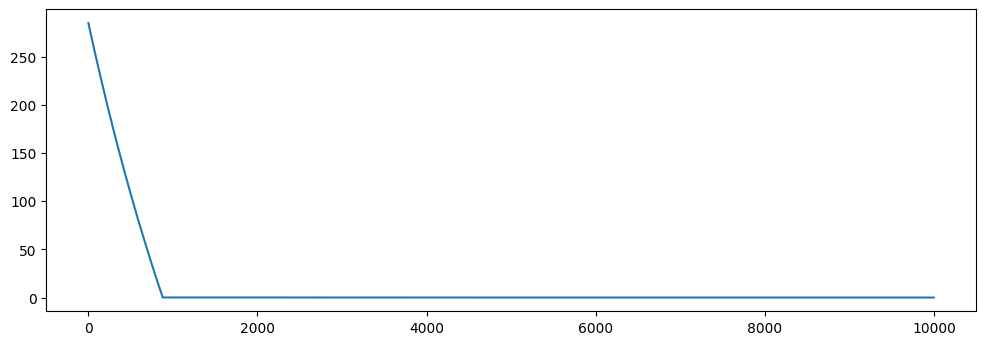

In [35]:
plt.plot(loss_t)


#### Check that the initial current setting is different that autoencoded bit-currents

In [36]:
print_json(simconfig.weight_bits.__dict__)


{
    "Iw_0": "1.0e-09",
    "Iw_1": "2.0e-09",
    "Iw_2": "4.0e-09",
    "Iw_3": "8.0e-09"
}


In [37]:
wparam.Iw


DeviceArray([4.0e-12, 4.8e-09, 6.1e-11, 8.1e-09], dtype=float32)

#### Check that weight masks are different as well

In [38]:
wparam.mux


DeviceArray([[[ 1,  0,  0,  0],
              [13,  0,  0,  0],
              [10,  0,  0,  0]],

             [[13,  0,  0,  0],
              [ 0,  0, 15,  0],
              [ 0,  0,  0,  0]]], dtype=int32)

In [39]:
simconfig.router.w_in_mask


array([[[ 2,  0,  0,  0],
        [ 7,  0,  0,  0],
        [13,  0,  0,  0]],

       [[ 8,  0,  0,  0],
        [ 0,  0, 14,  0],
        [ 0,  0,  0,  0]]])

#### Check that the resulting weight matrix is the same!

In [40]:
simconfig.w_in


DeviceArray([[[2.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [7.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [1.3e-08, 0.0e+00, 0.0e+00, 0.0e+00]],

             [[8.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [0.0e+00, 0.0e+00, 1.4e-08, 0.0e+00],
              [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]]], dtype=float32)

In [41]:
wparam.weights


DeviceArray([[[2.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [7.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [1.3e-08, 0.0e+00, 0.0e+00, 0.0e+00]],

             [[8.0e-09, 0.0e+00, 0.0e+00, 0.0e+00],
              [0.0e+00, 0.0e+00, 1.4e-08, 0.0e+00],
              [0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]]], dtype=float32)

In [42]:
np.testing.assert_equal(np.array(simconfig.w_in), np.array(wparam.weights))
